# 15. Noise Removal Project By Using Autoencoders

In [42]:
import tensorflow as tf
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

## By Using Deep Autoencoders

In [43]:
def add_salt_and_pepper_noise(images, salt_prob=0.01, pepper_prob=0.01):
    noisy_images = images.copy()

    salt_mask = np.random.rand(*images.shape) < salt_prob
    noisy_images[salt_mask] = 255

    pepper_mask = np.random.rand(*images.shape) < pepper_prob
    noisy_images[pepper_mask] = 0

    return noisy_images

In [44]:
(x_train, _), (x_test, _) = mnist.load_data()

In [45]:
x_train_noisy = add_salt_and_pepper_noise(x_train, salt_prob=0.05, pepper_prob=0.05)
x_test_noisy = add_salt_and_pepper_noise(x_test, salt_prob=0.05, pepper_prob=0.05)

In [46]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Text(0.5, 1.0, 'Original Image')

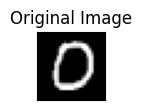

In [47]:
plt.figure(figsize=(3,3))
plt.subplot(1,3,1)
plt.imshow(x_test[10].reshape(28,-1),cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Original Image')

In [48]:
x_train_noisy = x_train_noisy.astype('float32') / 255
x_test_noisy = x_test_noisy.astype('float32') / 255
x_train_noisy = x_train_noisy.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_noisy = x_test_noisy.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 784)
(10000, 784)


Text(0.5, 1.0, 'Noise Image')

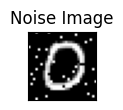

In [49]:
plt.figure(figsize=(3,3))
plt.subplot(1,3,1)
plt.imshow(x_test_noisy[10].reshape(28,-1),cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Noise Image')

In [50]:
input_img = keras.Input(shape=(784,))
encoded1 = layers.Dense(128, activation='relu')(input_img)
encoded2= layers.Dense(64, activation='relu')(encoded1)
encoded3 = layers.Dense(32, activation='relu')(encoded2)

decoded1 = layers.Dense(64, activation='relu')(encoded3)
decoded2= layers.Dense(128, activation='relu')(decoded1)
decoded3 = layers.Dense(784, activation='sigmoid')(decoded2)

In [51]:
encoder = keras.Model(input_img, encoded3)
decoder = keras.Model(encoded3, decoded3)

In [52]:
autoencoder = keras.Model(input_img, decoded3)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
autoencoder.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 64)                2112      
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 dense_17 (Dense)            (None, 784)               101

In [54]:
autoencoder.fit(x_train_noisy, x_train,epochs=50,batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/50
235/235 [==============================] - 5s 14ms/step - loss: 0.2524 - accuracy: 0.0089 - val_loss: 0.1758 - val_accuracy: 0.0075
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1604 - accuracy: 0.0100 - val_loss: 0.1473 - val_accuracy: 0.0138
Epoch 3/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1420 - accuracy: 0.0127 - val_loss: 0.1351 - val_accuracy: 0.0141
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1331 - accuracy: 0.0120 - val_loss: 0.1284 - val_accuracy: 0.0107
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1273 - accuracy: 0.0117 - val_loss: 0.1237 - val_accuracy: 0.0110
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1231 - accuracy: 0.0125 - val_loss: 0.1201 - val_accuracy: 0.0124
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1202 - accuracy: 0.0132 - val_loss: 0.1193 - val_accuracy: 0.0115

In [55]:
img = x_test_noisy[0]

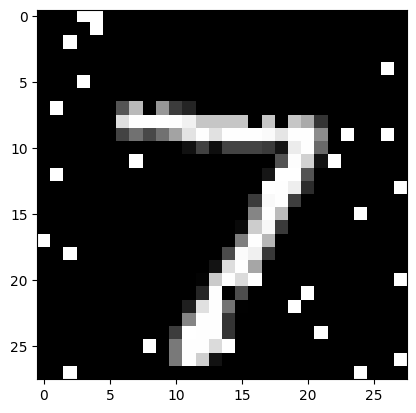

In [57]:
plt.imshow(img.reshape(28,-1), cmap='gray')
plt.show()

In [60]:
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

# decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


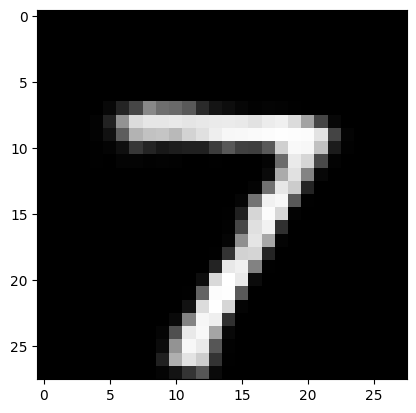

In [62]:
plt.imshow(decoded_imgs[0].reshape(28,-1), cmap='gray')
plt.show()

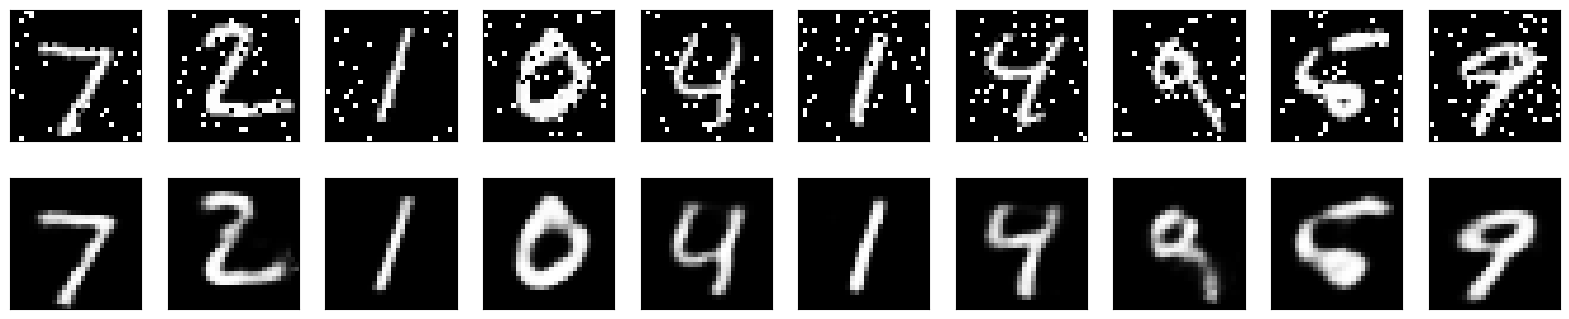

In [61]:
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## By Using the CNN Based Autoencoders

In [84]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 7, 7, 8)           0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 7, 7, 8)           584

In [85]:
(x_train, _), (x_test, _) = mnist.load_data()

In [86]:
x_train_noisy = add_salt_and_pepper_noise(x_train, salt_prob=0.05, pepper_prob=0.05)
x_test_noisy = add_salt_and_pepper_noise(x_test, salt_prob=0.05, pepper_prob=0.05)

In [87]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [88]:
x_train_noisy = x_train_noisy.astype('float32') / 255
x_test_noisy = x_test_noisy.astype('float32') / 255
x_train_noisy = np.reshape(x_train_noisy, (len(x_train), 28, 28, 1))
x_test_noisy =  np.reshape(x_test_noisy, (len(x_test), 28, 28, 1))
print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [89]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                validation_data=(x_test_noisy, x_test)
                )

Epoch 1/10
469/469 [==============================] - 58s 116ms/step - loss: 0.2376 - val_loss: 0.1561
Epoch 2/10
469/469 [==============================] - 53s 112ms/step - loss: 0.1443 - val_loss: 0.1343
Epoch 3/10
469/469 [==============================] - 52s 110ms/step - loss: 0.1317 - val_loss: 0.1266
Epoch 4/10
469/469 [==============================] - 51s 108ms/step - loss: 0.1255 - val_loss: 0.1225
Epoch 5/10
469/469 [==============================] - 52s 110ms/step - loss: 0.1216 - val_loss: 0.1187
Epoch 6/10
469/469 [==============================] - 54s 114ms/step - loss: 0.1189 - val_loss: 0.1164
Epoch 7/10
469/469 [==============================] - 52s 111ms/step - loss: 0.1168 - val_loss: 0.1148
Epoch 8/10
469/469 [==============================] - 54s 114ms/step - loss: 0.1151 - val_loss: 0.1137
Epoch 9/10
469/469 [==============================] - 53s 114ms/step - loss: 0.1137 - val_loss: 0.1119
Epoch 10/10
469/469 [==============================] - 53s 114ms/step - l

313/313 [==============================] - 4s 13ms/step


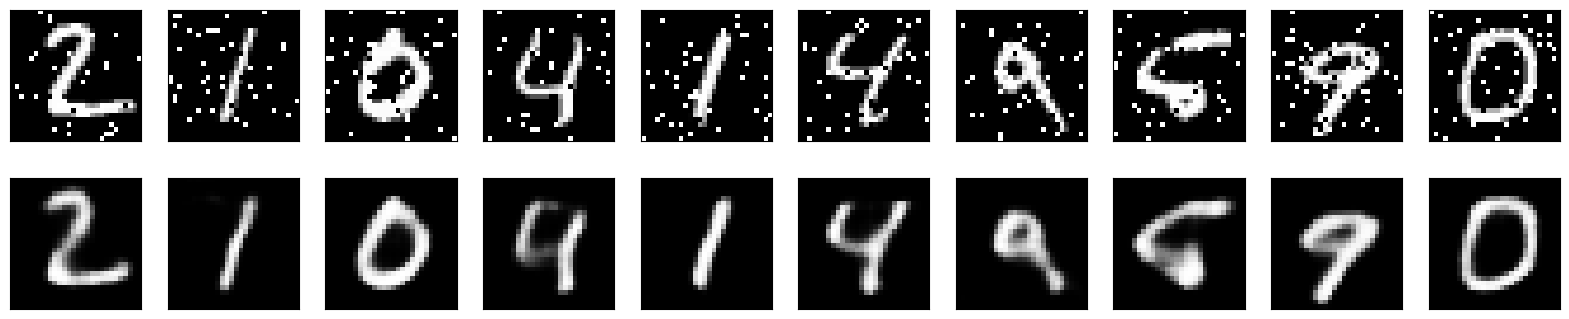

In [91]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()